### 《周處除三害》在社群媒體影響力與輿情分析
* 課程：社群媒體分析
* 授課教授：黃三益老師
* 組別：Group_7
* 組員：B094020019 陳羽楨、B104020035 陳達豐、B104020041 張世諭、B084011022 王煜凱、M124020025 吳安倢、M124020034 游凱翔、M124020041 洪維彤、M124020051 李柏翰

## 大綱
1. 資料介紹
  * 1.1 資料來源
  * 1.2 分析動機&目的
2. 資料前處理
  * 2.1 資料匯入
  * 2.2 資料清理
  * 2.3 斷詞及停用字處理
  * 2.4 計算詞頻
  * 2.5 文字雲
3. 情緒分析ㄧ
  * 3.1 lexicon-base 情緒分析
  * 3.2 觀察發文頻率
  * 3.3 正負向情緒詞彙頻率折線圖圖
  * 3.4 正負向情緒詞彙比例折線圖圖
  * 3.5 正負向情緒分數折線圖圖
  * 3.6 文章為單位的情緒分析
  * 3.7 情緒代表字
  * 3.7 文字雲
4. 情緒分析二
  * 4.1 套件安裝
  * 4.2 CKIP處理
  * 4.3 探索分析 - NER
  * 4.4 探索分析 - POS
  * 4.5 利用SnowNLP進行情緒分析
5. 結論


### 1. 資料介紹

* 資料來源
    * 文字平台收集PPT平台上與《周處除三害》相關的文章
    * 來源：電影版、八卦版
* 關鍵字：周處除三害
* 時間： 2023-10-01 ~ 2024-03-15
* 資料筆數：共 414 篇文章


* 分析動機

1. 社會意識提升：透過研究社群媒體上的對話和討論，提高公眾對當前社會問題（如環境保護、社會正義等）的認識和關注。
2. 情緒與觀點分析：分析社群媒體用戶對於此電影的情緒和觀點，以了解公眾的態度。
3. 趨勢追蹤：追蹤特定社會問題在社群媒體上的討論趨勢，包括話題的熱度變化、關鍵詞的演變等，以評估社會關注度的變化。

* 分析目的 

    影響力評估：分析《周處除三害》在PTT平台上的關注度，包括點讚、分享、評論等互動數據


### 前情提要

台灣電影《周處除三害》由香港導演黃精甫執導、編劇與剪輯！

電影從一開頭一位黑幫老大的告別式上，陳桂林衝出來毫不避諱的除掉其他黑幫尋仇，可以發現他做事的乾脆俐落，也透過一名小弟如何描述「桂林仔」看出陳桂林不僅很滿意江湖上有人注意到他，同時也很在意自己留下的名號，比起別人幫他取的綽號，他更希望留下正名。

「三害不除，何樂之有？」《周處除三害》劇情引用典故，描述通緝犯陳桂林在角頭大哥告別式上囂張尋仇，卻發現自己竟然只是排名第三的通緝犯。他查出前二名通緝犯的下落，要將他們一一除掉，以為自己已成為當代的周處除三害，卻沒想到永遠參不透的貪嗔癡，才是人生終要面對的罪與罰。

### 2. 資料前處理

### 2.1 資料匯入

In [2]:
from datetime import datetime
from collections import Counter
from PIL import Image, ImageSequence

import pandas as pd
import jieba
import jieba.analyse
import matplotlib.font_manager as fm

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('raw_data/moive_1.csv')
print(f"PTT 共有 {df.shape[0]} 篇文章") 

#將artDate欄位只留下 年/月/日
df['artDate'] = pd.to_datetime(df['artDate']).dt.date
df.head()


PTT 共有 430 篇文章


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,kevin19528,Gossiping,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mscmobitai"",...",27.53.121.199,2023-10-03 01:31:03,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,takuminauki,Gossiping,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PanaS0Nic"", ...",114.46.58.46,2023-10-04 01:36:57,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05,Hsins,Gossiping,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tearness"", ""...",61.223.222.252,2023-10-06 01:37:57,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1696578310....,[問卦]周處除三害是哪三害？☺,2023-10-06,HNCB2880,Gossiping,是這樣的啦\n\n軟今天演出周處除三害\n\n三害是大白虎 大蛟龍\n\n還有一害是什麼？\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""spzper"", ""cm...",223.136.68.101,2023-10-07 01:34:56,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,rainiem3m3,Gossiping,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",49.216.131.16,2023-10-07 01:35:28,ptt


### 2.2 資料清理
- 去除NA值
- 正規化資料清理
- 去除不是中文的字詞

In [35]:
#清理文章內容
clear_df = df.copy()
#去除有包含空值的筆數
clear_df.dropna(axis = 0, how = 'any', inplace = True)

#去除不會用到的欄位
drop_cols = ['system_id', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate','dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)


#移除內文中的網址
clear_df['sentence'] = (
    clear_df['artContent']
    .replace(r'http\S+', '', regex = True)
    .replace(r'www\S+', '', regex = True)
    .replace(r'\d+', '', regex = True)
    .replace(r'\n\n','。', regex=True)
    .replace(r'\n' ,',', regex=True)
)

clear_df.head(10)

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天去看我們金馬男神阮經天演的電影。開播前照慣例都會放過幾天要上映的預告片。之前加減都會放些...
1,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"今年金馬獎最佳男主角競爭激烈。台北電影節最佳男主角,疫起 王柏傑。金馬獎影帝,周處除三害 阮..."
2,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,"如題啦,最近聽朋友在那邊聊金馬入圍名單,聊一聊就聽到他們在說租屋的事,什麼租房子要除三害之類..."
3,https://www.ptt.cc/bbs/Gossiping/M.1696578310....,[問卦]周處除三害是哪三害？☺,2023-10-06,是這樣的啦\n\n軟今天演出周處除三害\n\n三害是大白虎 大蛟龍\n\n還有一害是什麼？\...,"是這樣的啦。軟今天演出周處除三害。三害是大白虎 大蛟龍。還有一害是什麼？。不是都說周處除三害嗎,"
4,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,今天周處除三害上映 最近也一堆金馬入圍新聞。但有人知道阮經天之前是如何嗎。用台灣健保在台灣長...
5,https://www.ptt.cc/bbs/Gossiping/M.1696719803....,[新聞]（新片搶鮮看）《蒼鷺與少年》奇幻旅程,2023-10-08,備註請放最後面 違者新聞文章刪除\n1.媒體來源:自由時報\n\n2.記者署名:許世穎\n\...,"備註請放最後面 違者新聞文章刪除,.媒體來源:自由時報。.記者署名:許世穎。.完整新聞標題:..."
6,https://www.ptt.cc/bbs/Gossiping/M.1696821659....,[問卦]大膽預測周處除三害會破億,2023-10-09,如題，昨天去電影院看周處除三害，說看過的國片裡面第一名的，超好看的，所以我大膽預測會破億，還...,如題，昨天去電影院看周處除三害，說看過的國片裡面第一名的，超好看的，所以我大膽預測會破億，還...
7,https://www.ptt.cc/bbs/Gossiping/M.1697185829....,[問卦]台灣人包容度是不是過高了,2023-10-13,只有我看到這個嗎\nhttps://i.imgur.com/P7BmXGq.jpg\n周處除...,"只有我看到這個嗎。周處除三害上映了,阿老實說 故事線是會想去看一下,畢竟麋先生一直是我的愛團..."
8,https://www.ptt.cc/bbs/Gossiping/M.1697380547....,[新聞]錢人豪點名阮經天《周處》涉抄襲！周一發,2023-10-15,記者江芷稜／綜合報導\n2023-10-15 19:33:04\n｜\n2023-10-15...,"記者江芷稜／綜合報導,-- ::,｜,-- ::,導演錢人豪近日在臉書指控某部上映中電影與他..."
9,https://www.ptt.cc/bbs/Gossiping/M.1697607887....,[新聞]錢人豪正式提告了！公開《周處除三害》,2023-10-18,1.媒體來源:\n三立\n\n2.記者署名:\n2023/10/18 12:07\n娛樂中心...,".媒體來源:,三立。.記者署名:,// :,娛樂中心／徐珮華報導。.完整新聞標題:,錢人豪正..."


* 斷句

中文主要以標點符號進行斷句，並清除空的字串

In [36]:
#清理符號
clear_df['sentence'] = clear_df['sentence'].astype(str).str.split("[,，。！!？?]{1,}")
sent_df = clear_df.explode("sentence").reset_index(drop=True)

#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)
sent_df = sent_df[sent_df["sentence"].str.len() > 1]
sent_df.head(10)

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天去看我們金馬男神阮經天演的電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播前照慣例都會放過幾天要上映的預告片
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,之前加減都會放些國外的預告片
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,結果昨天播了三部電影預告片全部都是臺灣國產
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,周處除三害
5,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,女鬼橋
6,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,動物感傷の清晨
7,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,尤其是動物感傷那部的預告片有夠煽情的啦
8,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,回到重點
9,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,今年是國片元年嗎


### 2.3 斷詞及停用字處理

使用jieba套件進行斷詞與移除停用字

In [37]:
#設定繁體中文詞庫
jieba.set_dictionary("dict/dict.txt")
#新增自定義字典
jieba.load_userdict("dict/user_dict.txt")

Building prefix dict from /Users/wuanjie/Desktop/NLP/text_mining/dict/dict.txt ...
Loading model from cache /var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/jieba.uf8df03e0c58ce17b83ddd2fb27e334a4.cache
Loading model cost 1.118 seconds.
Prefix dict has been built successfully.


In [38]:
#對文章內容進行斷詞處理
word_df = (
    sent_df.assign(word=sent_df["sentence"].apply(jieba.lcut))
    .explode("word")
    .drop(["sentence"], axis=1)
)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df.head(10)

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,我們
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,前照
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,慣例
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,放過


In [39]:
word_df.shape

(47095, 5)

* 計算去除停用字

In [40]:
freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_df.head(10)

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_94419/36027799.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


,word,count
0,電影,598
1,周處除三害,497
2,台灣,452
3,最佳,325
4,阮經天,269
5,陳桂林,247
6,票房,247
7,就是,228
8,中國,215
9,自己,204


In [41]:
freq_df.shape

(11563, 2)

### 2.4 計算詞頻

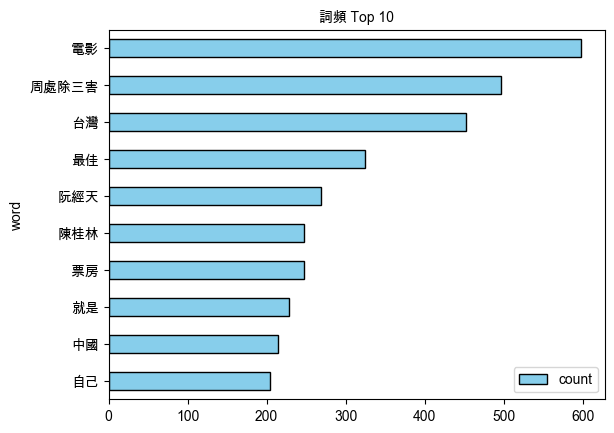

In [42]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']

ax =freq_df.head(10).plot.barh(x = 'word', y = 'count',color='skyblue', edgecolor='black')
ax.invert_yaxis()
plt.title('詞頻 Top 10', fontsize=10)       
plt.show()

In [43]:
# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

freq_dict

{'電影': 598,
 '周處除三害': 497,
 '台灣': 452,
 '最佳': 325,
 '阮經天': 269,
 '陳桂林': 247,
 '票房': 247,
 '就是': 228,
 '中國': 215,
 '自己': 204,
 '一個': 203,
 '香港': 189,
 '覺得': 188,
 '真的': 187,
 '周處': 183,
 '沒有': 181,
 '導演': 167,
 '最後': 162,
 '主角': 161,
 '故事': 158,
 '不是': 150,
 '可以': 149,
 '上映': 148,
 '入圍': 145,
 '知道': 134,
 '劇情': 129,
 '角色': 128,
 '這個': 124,
 '金馬': 123,
 '看到': 123,
 '還是': 122,
 '這部': 116,
 '因為': 115,
 '大陸': 109,
 '黑道': 109,
 '邪教': 109,
 '大家': 102,
 '國片': 100,
 '什麼': 100,
 '演員': 98,
 '今天': 96,
 '還有': 96,
 '如果': 91,
 '新聞': 90,
 '所以': 89,
 '很多': 87,
 '這樣': 87,
 '觀眾': 85,
 '開始': 84,
 '然後': 82,
 '其實': 81,
 '王淨': 80,
 '只是': 80,
 '應該': 79,
 '現在': 79,
 '感覺': 77,
 '已經': 73,
 '但是': 72,
 '通緝犯': 72,
 '怎麼': 71,
 '尊者': 70,
 '這麼': 69,
 '結果': 69,
 '他們': 69,
 '成為': 68,
 'on': 67,
 'my': 67,
 'from': 67,
 'Sent': 67,
 '台幣': 66,
 '影帝': 66,
 '可能': 66,
 '不過': 66,
 '一下': 66,
 '第一': 65,
 '演技': 65,
 '雖然': 65,
 '完全': 63,
 '醫生': 63,
 '李烈': 62,
 '這種': 61,
 '金馬獎': 61,
 '最近': 61,
 '發現': 60,
 '之後': 59,
 '那個': 59,
 '時候

### 2.5 繪製文字雲

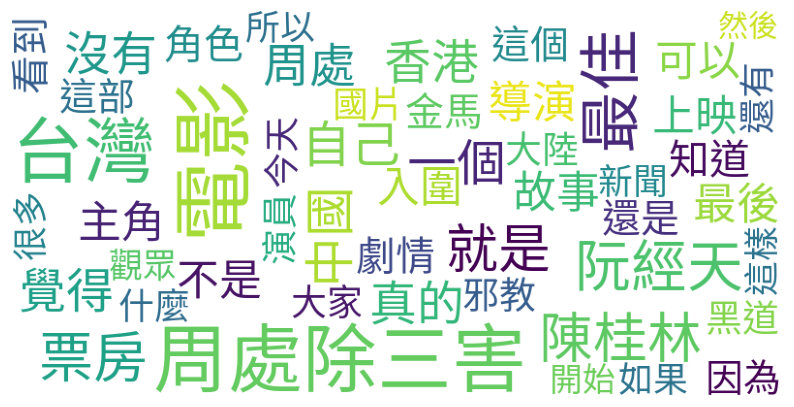

In [44]:
FontPath = 'raw_data/SourceHanSansTW-Regular.otf' # 設定字型

# 繪製文字雲
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

移除停用字

In [45]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

In [46]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df.head(10)

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,前照
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,慣例
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,放過
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,幾天要


移除停用字後，可以看到「自己」、「就是」等等比較無關緊要的字詞就被移除掉

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_94419/583685406.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


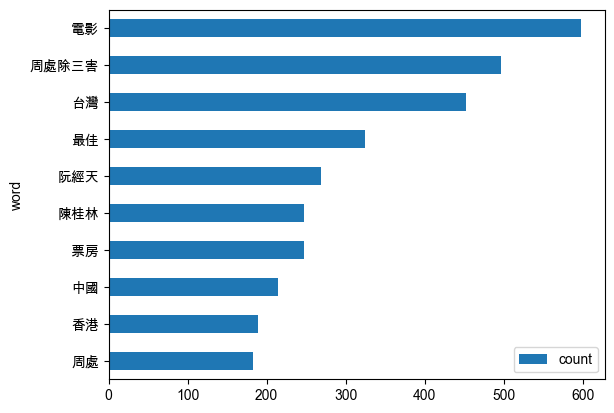

In [47]:
freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()

freq_df_nostop.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()
plt.show()

重新繪製文字雲

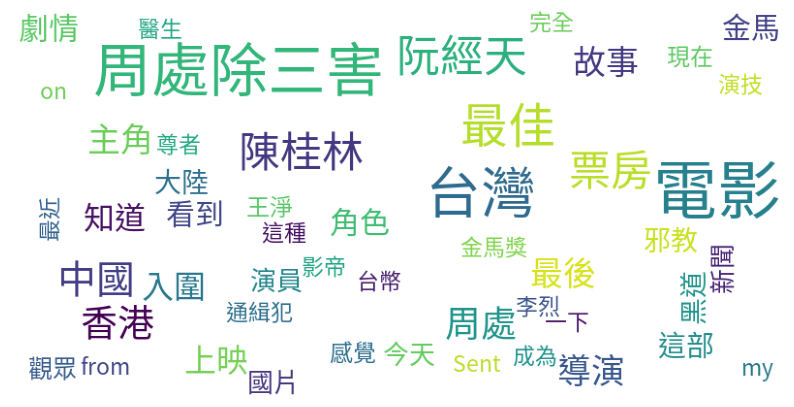

In [48]:
freq_dict_nostop = freq_df_nostop.set_index('word').to_dict()
freq_dict_nostop = freq_dict_nostop['count']

# 繪製文字雲
wordcloud_nostop = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_nostop.generate_from_frequencies(freq_dict_nostop)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_nostop)
plt.axis('off')
plt.show()

更新停用字字典

In [64]:
# 將stopwords存成list
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 
# 手動加入停用字
stopwords_manual = ["周處", "三害", "看到", "一下", "這邊","這種","最近","現在","之後","台幣","from", "on", "Sent", "JPTT", "my"]
stopwords.extend(stopwords_manual)

In [65]:
noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_2.head(10)

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,前照
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,慣例
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,放過
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,幾天要


更新斷詞字典

In [51]:
# 載入自定義辭典
jieba.load_userdict("dict/user_dict.txt")

參數形式手動加入字詞

In [52]:
jieba.add_word('周處除三害')

In [53]:
# 查看目前‘周處除三害’出現幾次
noStop_df_2[noStop_df_2['word'] == ('周處除三害')]['word'].count()

497

重新斷詞

In [66]:
# sent_df是還沒斷詞過的df
word_df_updated = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_updated = word_df_updated.loc[word_df_updated['word'].str.len()>1]
word_df_updated

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,我們
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天
...,...,...,...,...,...
13134,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,哪些
13135,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,大眾
13135,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,表演
13136,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,非常


重新移除停用字

In [67]:
nostop_df_updated = word_df_updated[~word_df_updated['word'].isin(stopwords)]

nostop_df_updated

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影
...,...,...,...,...,...
13133,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,男人味
13134,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,未來
13135,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,大眾
13135,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,表演


In [68]:
# 查看目前‘周處除三害’出現幾次
nostop_df_updated[nostop_df_updated['word'] == ('周處除三害')]['word'].count()

497

重新計算詞頻

In [69]:
freq_df_updated = pd.DataFrame(pd.value_counts(nostop_df_updated['word'])).sort_values(by = ['count'], ascending = False).reset_index()

freq_df_updated

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_94419/4165249668.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_updated = pd.DataFrame(pd.value_counts(nostop_df_updated['word'])).sort_values(by = ['count'], ascending = False).reset_index()


,word,count
0,電影,598
1,周處除三害,497
2,台灣,452
3,最佳,325
4,阮經天,269
...,...,...
11125,第期,1
11126,來歷,1
11127,左眉,1
11128,很連戲,1


重新繪製詞頻長條圖

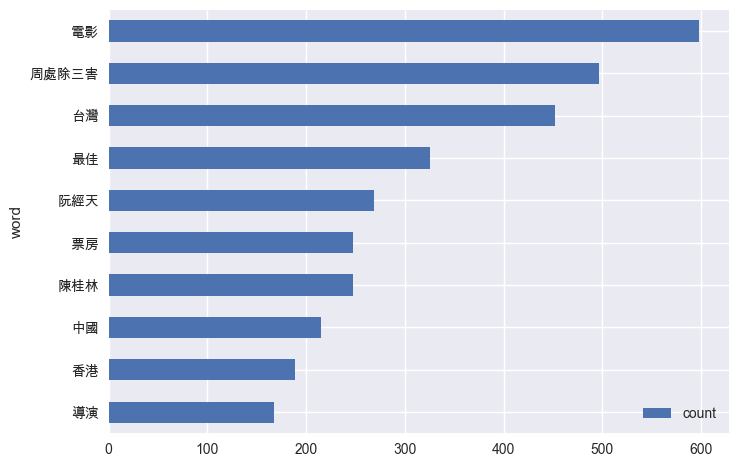

In [317]:
freq_df_updated.head(10).plot.barh(x='word', y='count').invert_yaxis()
plt.show()

繪製文字雲

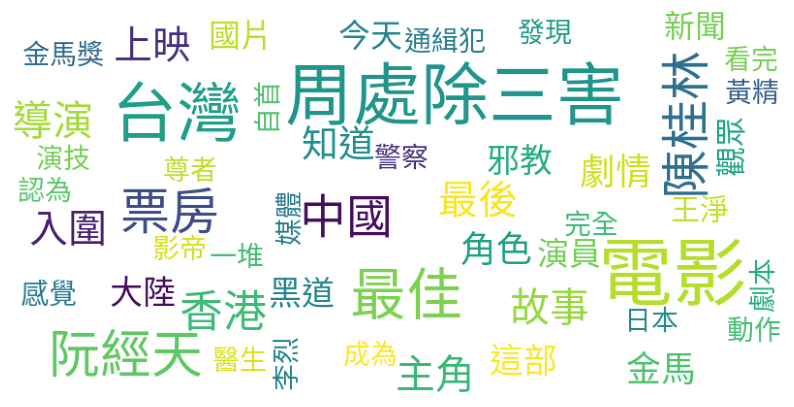

In [70]:
freq_dict_updated = freq_df_updated.set_index('word').to_dict()
freq_dict_updated = freq_dict_updated['count']

# 繪製文字雲
wordcloud_after = WordCloud(background_color='white', width=800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_after.generate_from_frequencies(freq_dict_updated)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_after)
plt.axis('off')
plt.show()

比較清理前後的文字雲

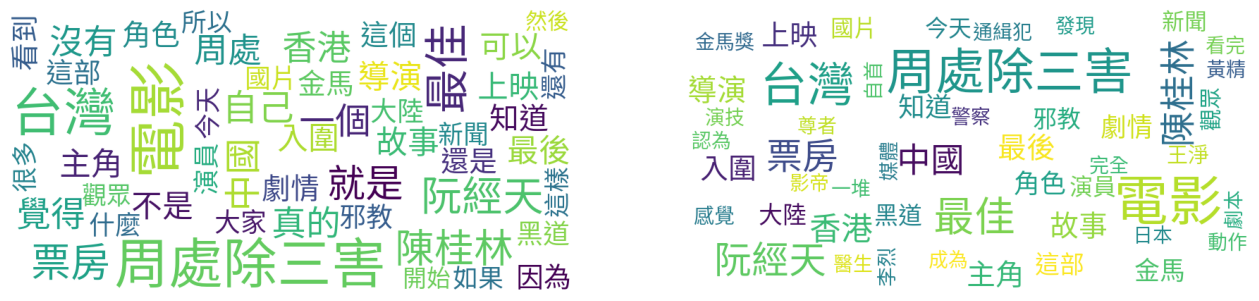

In [71]:
plt.figure(figsize = (16,10))

plt.subplot(1,2,1)
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_after)
plt.axis('off')

plt.show()

### 3.文章內容分析

### 3.1 lexicon-base 情緒分析

- 進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併。

In [119]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

,word,sentiments
0,):,affect
1,3q,affect
2,:(,affect
3,:),affect
4,<3,affect


In [120]:
liwc_dict['sentiments'].describe()

count       4682
unique         6
top       affect
freq        2061
Name: sentiments, dtype: object

將情緒字典與斷詞結果進行合併。

In [121]:
ptt_liwc_df = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent", "word"]], liwc_dict, how="left")
ptt_liwc_df

,artUrl,artDate,artTitle,artContent,word,sentiments
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天,NaN
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬,NaN
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神,NaN
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天,NaN
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影,NaN
...,...,...,...,...,...,...
43214,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,2024-03-17,[新聞]阮經天5件事！28歲奪影帝陷低潮,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,男人味,NaN
43215,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,2024-03-17,[新聞]阮經天5件事！28歲奪影帝陷低潮,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,未來,NaN
43216,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,2024-03-17,[新聞]阮經天5件事！28歲奪影帝陷低潮,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,大眾,NaN
43217,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,2024-03-17,[新聞]阮經天5件事！28歲奪影帝陷低潮,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,表演,NaN


分別畫出正向（positive）與負向（negative）情緒的折線圖

In [122]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count['sentiments'] == "positive") | (sentiment_count['sentiments'] == "negative") 
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
2,2023-10-01,negative,6
3,2023-10-01,positive,12
7,2023-10-02,negative,5
8,2023-10-02,positive,15
13,2023-10-03,negative,11
...,...,...,...
305,2024-03-15,positive,14
310,2024-03-16,negative,57
311,2024-03-16,positive,61
316,2024-03-17,negative,32


### 3.2 觀察發文頻率
透過觀察發文頻率以找出引起最多討論的時期。

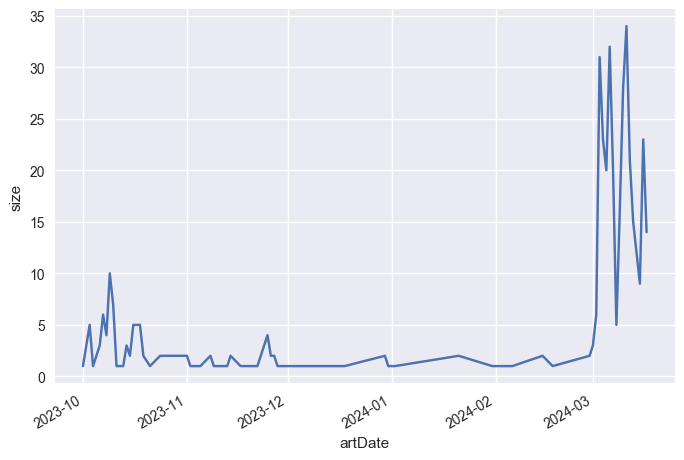

In [123]:
ptt_df = df.copy()
#只看日期，不抓時間

ptt_df["artDate"] = pd.to_datetime(ptt_df["artDate"])
ptt_df["artDate"] = ptt_df["artDate"].dt.date


#畫圖
ptt_line_plot = ptt_df.groupby(["artDate"], as_index=False).size()
fig, ax = plt.subplots()

ax.plot(ptt_line_plot["artDate"], ptt_line_plot["size"])
ax.set_xlabel("artDate")
ax.set_ylabel('size')
fig.autofmt_xdate()
plt.show()

根據媒體報導，號稱台灣影史最惡電影的《周處除三害》，自3月1日在中國大陸上映，連續十天創下單日最高票房紀錄，累積至今已超過17億台幣，是少數登陸成功而大有斬獲的國片。但《周處除三害》該片去年就已在台灣上映！

也因此面對近期《周處除三害》在大陸掀起熱議，就有PTT網友詢問：「周處除三害台灣票房怎麼這麼淒慘？」而引發討論度！

### 3.3 正負向情緒詞彙頻率折線圖

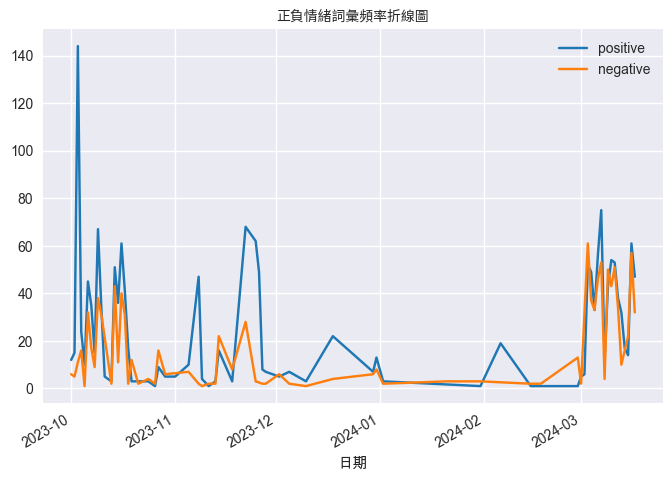

In [124]:
# plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms'] #使 matplotilb 中文能正常顯示
fprop = fm.FontProperties(fname="raw_data/SourceHanSansTW-Regular.otf")

colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("日期")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)  # 顯示中文
plt.show()

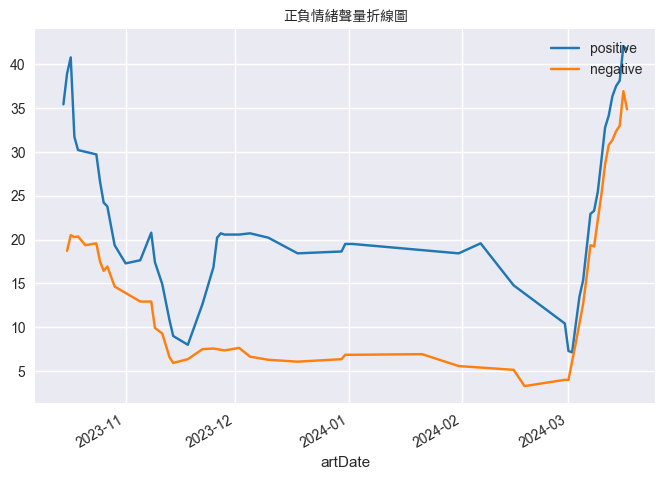

In [125]:
# moving average

colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒聲量折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

經折線圖大略可知正面情緒高於負面情緒，但細部辨識有難度，故繪製比例折線圖以利觀察。

### 3.4 正負向情緒詞彙比例折線圖

In [126]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

,artDate,sentiments,size,ratio
2,2023-10-01,negative,6,0.333333
3,2023-10-01,positive,12,0.666667
7,2023-10-02,negative,5,0.250000
8,2023-10-02,positive,15,0.750000
13,2023-10-03,negative,11,0.070968
...,...,...,...,...
305,2024-03-15,positive,14,0.388889
310,2024-03-16,negative,57,0.483051
311,2024-03-16,positive,61,0.516949
316,2024-03-17,negative,32,0.405063


In [127]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

Text(0.5, 1.0, '正負情緒比例折線圖')

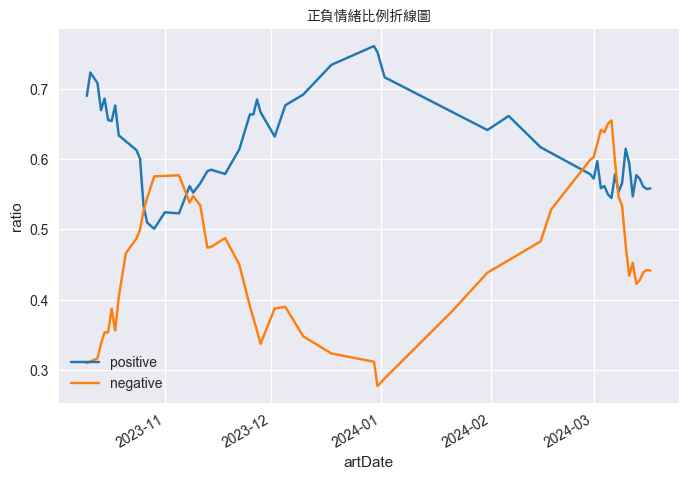

In [128]:
fig, ax = plt.subplots()

rolling_days = 10
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

In [129]:
sentiment_count

,artDate,sentiments,size,ratio
2,2023-10-01,negative,6,0.333333
3,2023-10-01,positive,12,0.666667
7,2023-10-02,negative,5,0.250000
8,2023-10-02,positive,15,0.750000
13,2023-10-03,negative,11,0.070968
...,...,...,...,...
305,2024-03-15,positive,14,0.388889
310,2024-03-16,negative,57,0.483051
311,2024-03-16,positive,61,0.516949
316,2024-03-17,negative,32,0.405063


### 3.5 正負面情緒分數折線圖
透過正負面情緒分數來了解發文者對周處除三害相關議題的情緒。

In [130]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

,artDate,negative,positive
0,2023-10-01,6.0,12.0
1,2023-10-02,5.0,15.0
2,2023-10-03,11.0,144.0
3,2023-10-04,16.0,24.0
4,2023-10-05,1.0,10.0


In [131]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    -ptt_sentiment_value["negative"]
)
ptt_sentiment_value.head()

,artDate,negative,positive,sentiment_value
0,2023-10-01,6.0,12.0,6.0
1,2023-10-02,5.0,15.0,10.0
2,2023-10-03,11.0,144.0,133.0
3,2023-10-04,16.0,24.0,8.0
4,2023-10-05,1.0,10.0,9.0


Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

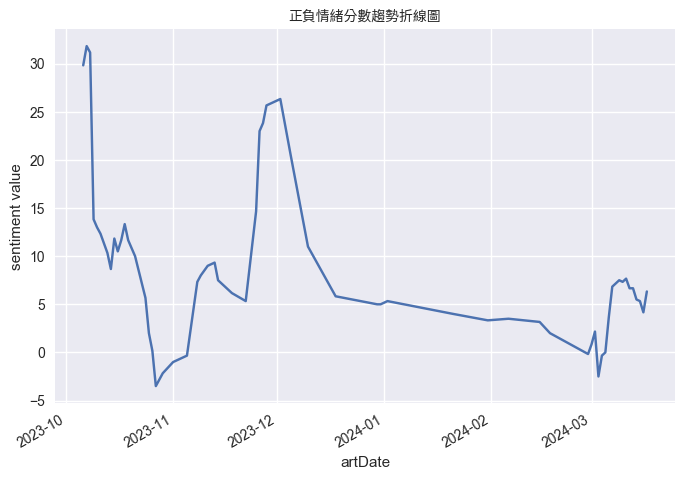

In [132]:
fig, ax = plt.subplots()

rolling_days = 6
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

可以看出10月末到11月中分數趨勢線下降，但從上面的聲量折線圖我們可以看出應該是討論度大幅度下降。

### 3.6 文章為單位的情緒分析

In [133]:
sentiment_count_by_article = pd.DataFrame(
   ptt_liwc_df.groupby(["artUrl", "sentiments"]).size()
).reset_index()
sentiment_count_by_article = sentiment_count_by_article.rename(columns={0: "size"})
sentiment_count_by_article

,artUrl,sentiments,size
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,affect,2
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,negative,2
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,sad,2
3,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,affect,5
4,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,anger,1
...,...,...,...
1177,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,affect,34
1178,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,anger,3
1179,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,anx,2
1180,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,negative,6


In [134]:
ptt_sentiment_value_by_article = (
    sentiment_count_by_article.pivot_table(
        index="artUrl", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value_by_article.head()

,artUrl,affect,anger,anx,negative,positive,sad
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2.0,0.0,0.0,2.0,0.0,2.0
1,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,5.0,1.0,0.0,1.0,3.0,0.0
2,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,2.0,0.0,0.0,1.0,1.0,0.0
3,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,3.0,0.0,0.0,0.0,2.0,0.0
4,https://www.ptt.cc/bbs/Gossiping/M.1696719803....,22.0,2.0,2.0,8.0,12.0,0.0


In [135]:
#  sentiment 計算方式: positive - negative
ptt_sentiment_value_by_article["sentiment_value"] = (
   ptt_sentiment_value_by_article["positive"]
    - ptt_sentiment_value_by_article["negative"]
)
ptt_sentiment_value_by_article.head()

,artUrl,affect,anger,anx,negative,positive,sad,sentiment_value
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2.0,0.0,0.0,2.0,0.0,2.0,-2.0
1,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,5.0,1.0,0.0,1.0,3.0,0.0,2.0
2,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,2.0,0.0,0.0,1.0,1.0,0.0,0.0
3,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,3.0,0.0,0.0,0.0,2.0,0.0,2.0
4,https://www.ptt.cc/bbs/Gossiping/M.1696719803....,22.0,2.0,2.0,8.0,12.0,0.0,4.0


In [136]:
ptt_sentiment_value_by_article['sentiment_class'] = ptt_sentiment_value_by_article['sentiment_value'].apply(lambda x: "正向" if x > 0 else "負向" )
ptt_sentiment_value_by_article

,artUrl,affect,anger,anx,negative,positive,sad,sentiment_value,sentiment_class
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2.0,0.0,0.0,2.0,0.0,2.0,-2.0,負向
1,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,5.0,1.0,0.0,1.0,3.0,0.0,2.0,正向
2,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,2.0,0.0,0.0,1.0,1.0,0.0,0.0,負向
3,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,3.0,0.0,0.0,0.0,2.0,0.0,2.0,正向
4,https://www.ptt.cc/bbs/Gossiping/M.1696719803....,22.0,2.0,2.0,8.0,12.0,0.0,4.0,正向
...,...,...,...,...,...,...,...,...,...
346,https://www.ptt.cc/bbs/movie/M.1710573924.A.E0...,22.0,4.0,5.0,10.0,11.0,1.0,1.0,正向
347,https://www.ptt.cc/bbs/movie/M.1710601237.A.9F...,5.0,0.0,0.0,1.0,4.0,0.0,3.0,正向
348,https://www.ptt.cc/bbs/movie/M.1710604377.A.13...,13.0,1.0,0.0,1.0,10.0,0.0,9.0,正向
349,https://www.ptt.cc/bbs/movie/M.1710660412.A.06...,9.0,0.0,0.0,3.0,6.0,2.0,3.0,正向


In [137]:
ptt_sentiment_value_by_article['sentiment_class'].value_counts()

sentiment_class
正向    192
負向    159
Name: count, dtype: int64

In [138]:
clear_df_sentiment = pd.merge(df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
clear_df_sentiment["artDate"] = pd.to_datetime(clear_df_sentiment["artDate"])
clear_df_sentiment['artDate'] = clear_df_sentiment['artDate'].dt.date
clear_df_sentiment

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource,sentiment_class
0,1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,kevin19528,Gossiping,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mscmobitai"",...",27.53.121.199,2023-10-03 01:31:03,ptt,負向
1,2,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,takuminauki,Gossiping,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PanaS0Nic"", ...",114.46.58.46,2023-10-04 01:36:57,ptt,正向
2,3,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05,Hsins,Gossiping,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tearness"", ""...",61.223.222.252,2023-10-06 01:37:57,ptt,負向
3,4,https://www.ptt.cc/bbs/Gossiping/M.1696578310....,[問卦]周處除三害是哪三害？☺,2023-10-06,HNCB2880,Gossiping,是這樣的啦\n\n軟今天演出周處除三害\n\n三害是大白虎 大蛟龍\n\n還有一害是什麼？\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""spzper"", ""cm...",223.136.68.101,2023-10-07 01:34:56,ptt,NaN
4,5,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,rainiem3m3,Gossiping,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",49.216.131.16,2023-10-07 01:35:28,ptt,正向
...,...,...,...,...,...,...,...,...,...,...,...,...
425,426,https://www.ptt.cc/bbs/movie/M.1710573924.A.E0...,[普雷]周處除三害,2024-03-16,adagiox,movie,周處除三害的三害香港仔、尊者、陳桂林到底代表的是那三害？\n\n香港仔代表的其實是資本主義，...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""n3688"", ""cmt...",180.217.249.254,2024-03-18 01:56:22,ptt,正向
426,427,https://www.ptt.cc/bbs/movie/M.1710601237.A.9F...,"Re:[討論]原來""熱辣滾燙""是改編日片""百元之戀""呀!!",2024-03-16,taot917,movie,不知道在反三小，我覺得看電影就看電影\n一直計較奇怪的點\n\n當男人戀愛時，也是翻拍阿！！...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""ilovedirk41""...",123.192.217.112,2024-03-18 01:56:24,ptt,正向
427,428,https://www.ptt.cc/bbs/movie/M.1710604377.A.13...,[新聞]阮經天被鎖定！億萬導演認了：我一直在打,2024-03-16,yu1164,movie,新聞網址：\nhttps://reurl.cc/13NpbW\n〔記者廖俐惠／台北報導〕阮經...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""jason88223"",...",180.218.234.142,2024-03-18 01:56:24,ptt,正向
428,429,https://www.ptt.cc/bbs/movie/M.1710660412.A.06...,[新聞]《周處除三害》賣破21億！阮經天被敲碗,2024-03-17,HTC92,movie,新聞網址：\nhttps://star.ettoday.net/news/2701953\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""rtoday"", ""cm...",111.251.92.135,2024-03-18 01:56:26,ptt,正向


In [139]:
sentiment_art_count = pd.DataFrame(
    clear_df_sentiment.groupby(["artDate", "sentiment_class"]).size()
).reset_index()

#統計每種情感分類在每個日期下的文章數量
sentiment_art_count = sentiment_art_count.rename(columns={0: "size"})
sentiment_art_count = sentiment_art_count.sort_values(["artDate"])
sentiment_art_count

,artDate,sentiment_class,size
0,2023-10-01,正向,1
1,2023-10-02,正向,2
2,2023-10-02,負向,1
3,2023-10-03,正向,5
4,2023-10-04,正向,1
...,...,...,...
91,2024-03-15,負向,5
92,2024-03-16,正向,7
93,2024-03-16,負向,7
94,2024-03-17,正向,6


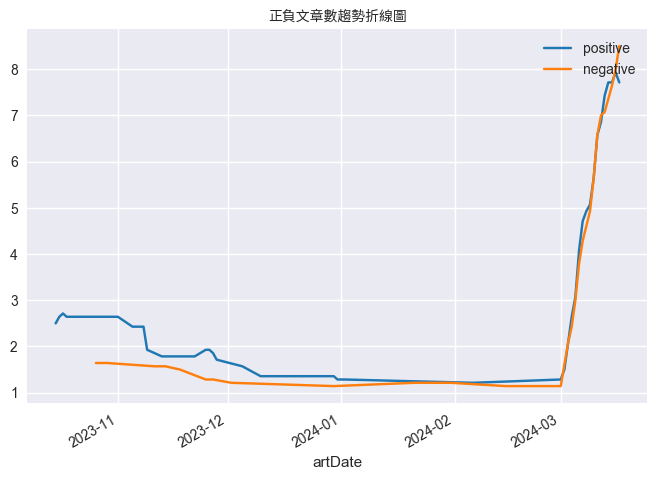

In [140]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_art_count[sentiment_art_count["sentiment_class"] == "正向"]
neg = sentiment_art_count[sentiment_art_count["sentiment_class"] == "負向"]

fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 4 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])


plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負文章數趨勢折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

本電影在2023/10就已經上映，當時討論度並無明顯成長，3月中國大陸上映後，討論度大幅上升。

### 3.7 情緒代表字

In [141]:
word_count =ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

,word,sentiments,size
819,最佳,positive,325
818,最佳,affect,325
303,喜歡,affect,49
38,不錯,affect,49
39,不錯,positive,49
...,...,...,...
561,恐嚇,anx,1
560,恐嚇,anger,1
99,值錢,affect,1
96,倒楣,negative,1


In [142]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos.head(15)

,word,sentiments,size
819,最佳,positive,325
39,不錯,positive,49
77,作品,positive,49
304,喜歡,positive,49
832,朋友,positive,43
471,希望,positive,33
680,成功,positive,30
1134,精彩,positive,27
886,決定,positive,25
190,創作,positive,24


In [143]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg.head(15)

,word,sentiments,size
161,八卦,negative,38
871,死刑,negative,37
815,暴力,negative,36
286,問題,negative,36
1276,詐騙,negative,25
1009,犯罪,negative,24
527,復仇,negative,20
584,悲傷,negative,15
605,情緒,negative,14
1297,諷刺,negative,14


/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_94419/3146652837.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_94419/3146652837.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(neg["word"], fontproperties=fprop)


Text(0.5, 1.0, '負向情緒總數')

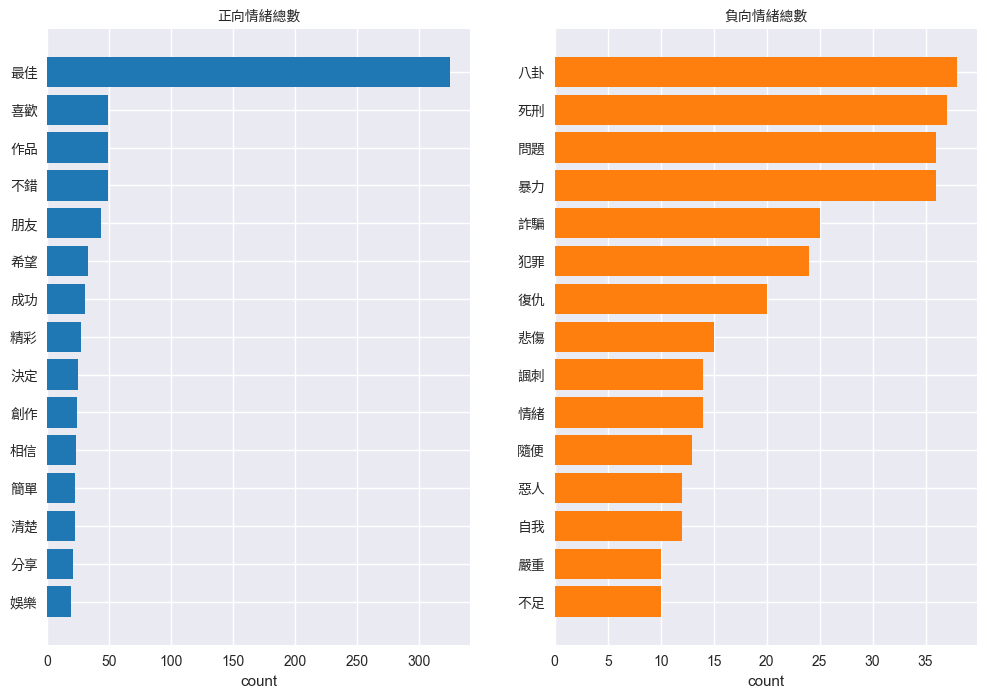

In [144]:
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2,figsize=(12, 8))

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

檢查情緒詞是否符合本文本

In [145]:
filtered_df = sent_df[sent_df['sentence'].str.contains('問題', na=False)]
filtered_df.head()

,artUrl,artTitle,artDate,artContent,sentence
451,https://www.ptt.cc/bbs/Gossiping/M.1699157710....,Re:[新聞]賴清德：組清廉政府贏回人民信任,2023-11-05,其實我過去也是頗為肯定賴清德，至少潔身自愛，個人操守經得起考驗。\n\n然而從2014年觀察...,先證明自己能處理身邊的問題吧
1343,https://www.ptt.cc/bbs/Gossiping/M.1709633704....,[問卦]周處除三害，是不是在台灣被打壓,2024-03-05,昨天看了周處除三害\n\n哇靠，很好看啊！\n\n講卡司有卡司，講演技有演技\n講動作有動作...,當初宣傳是遇到什麼問題
1479,https://www.ptt.cc/bbs/Gossiping/M.1709656829....,[問卦]周處除三害的大boss不是阮經天,2024-03-06,各位水水安安\n\n各位帥帥安安\n\n各位肥宅安安\n\n大家好唷\n\n小妹想要問問大家...,小妹想要問問大家一個問題
1494,https://www.ptt.cc/bbs/Gossiping/M.1709657851....,[問卦]台灣有很多邪教嗎???,2024-03-06,各位水水安安\n\n各位帥帥安安\n\n各位肥宅安安\n\n大家好唷\n\n小妹想要問問大家...,小妹想要問問大家一個問題
1620,https://www.ptt.cc/bbs/Gossiping/M.1709716893....,[問卦]現代台灣拍周處除三害是哪三害?,2024-03-06,剛下班在塞車的各位安安阿，啊我就心齋橋哥啦\n\n好不容易有比較有話題的國片上映了\n\n片...,現在台灣問題也是蠻多的


In [146]:
for sentence in filtered_df['sentence'].to_list():
    print(sentence)
    print("=========================")

先證明自己能處理身邊的問題吧
當初宣傳是遇到什麼問題
小妹想要問問大家一個問題
小妹想要問問大家一個問題
現在台灣問題也是蠻多的
出來幫大眾解決詐騙 食安 販毒等問題
橫著走都沒問題
是政策問題還是市場問題
現在的台灣有虐童 食安 毒品 槍械等社會問題
怎會有除三害的問題
小妹想要問問大家一個問題
那這時問題來了
小妹想要問問大家一個問題
小妹想要問問大家一個問題
但一直認為國片最大的問題還是流暢度跟劇情
但覺得很多國片一直有如上所述的問題
這個靈修中心是有問題的
合理性和邏輯性已經不是我在意的問題
見到尊者就知道尊者有問題啦XD那
雖然早就知道教主有問題但一開始還真的包裝的很好
劇情深度涉及了台灣的新興宗教問題
雖然還是有主角威能太過強大或是這樣那樣的小問題
以成長故事揭開一段讓人心碎的家庭問題
身旁的人馬上回說沒問題沒問題
他電影問題就不少
 有時是一種環境問題
那麼問題來了
這兩部我覺得都有一個問題 就是警察的描寫似乎有點多餘 我的意思是即便這些警察 不去
就只是選擇問題而已
包括槍枝氾濫黑社會組織嚴重和醫療行業問題等
善與惡或許已經不是最重要的問題
而且還影響到整個韓國的國安問題
或者問題可以改成
而是思考問題的根源


In [147]:
# 設定要移除的字詞列表
words_to_remove = ['朋友','創作','娛樂','自由','相信','自我','決定','八卦']
# 使用 ~ 運算子和 isin() 方法過濾掉包含在 words_to_remove 列表中的行
liwc_dict_revise = liwc_dict[~liwc_dict['word'].isin(words_to_remove)]
# 使用更新後的情緒字典 merge
ptt_liwc_df_revise = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent","word"]], liwc_dict_revise, how="left")
ptt_liwc_df_revise.head()

,artUrl,artDate,artTitle,artContent,word,sentiments
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天,NaN
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬,NaN
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神,NaN
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天,NaN
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影,NaN


重新計算情緒

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_94419/1054577046.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_94419/1054577046.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(neg["word"], fontproperties=fprop)


Text(0.5, 1.0, '負向情緒總數')

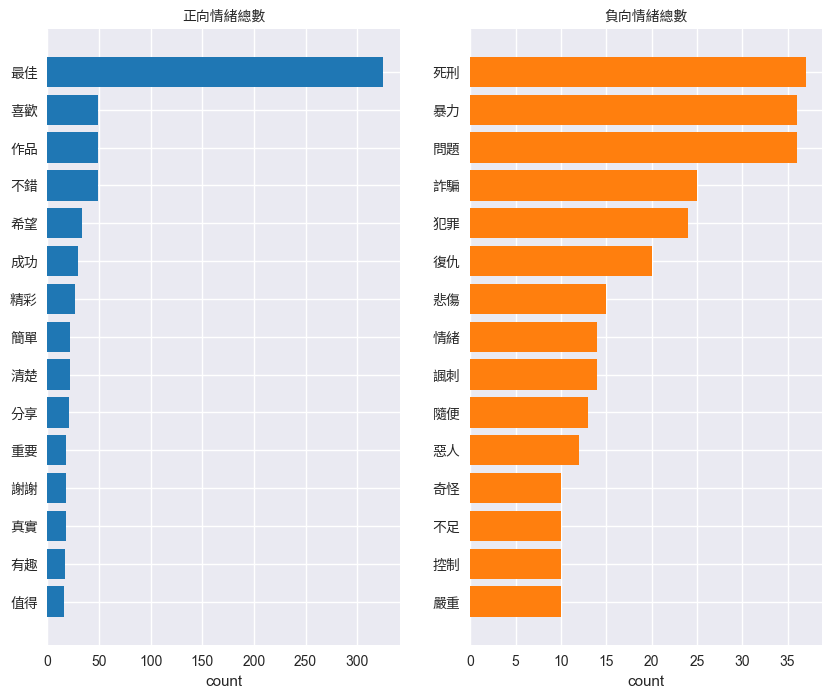

In [148]:
word_count = ptt_liwc_df_revise.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2,figsize=(10, 8))

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

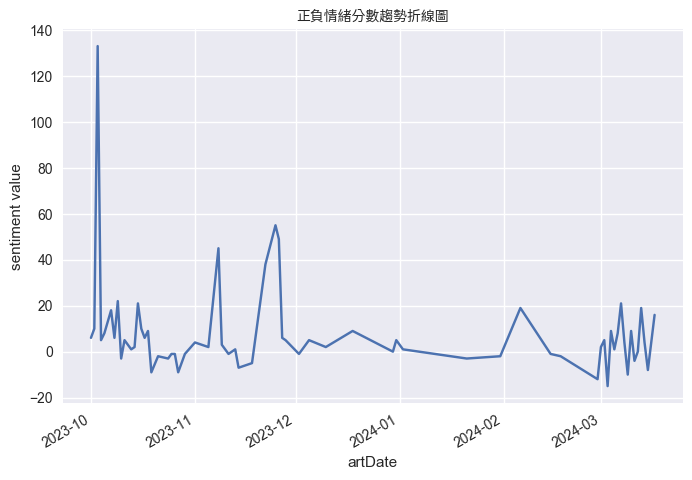

In [149]:
sentiment_count_revise = pd.DataFrame(
    ptt_liwc_df_revise.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count_revise['sentiments'] == "positive") | (sentiment_count_revise['sentiments'] == "negative") 
sentiment_count_revise = sentiment_count_revise.loc[mask]

sentiment_count_revise = sentiment_count_revise.rename(columns={0: "size"})
sentiment_count_revise = sentiment_count_revise.sort_values(["artDate"])

ptt_sentiment_value_revise = (
    sentiment_count_revise.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)

# sentiment 計算方式: positive - negative
ptt_sentiment_value_revise["sentiment_value"] = (
    ptt_sentiment_value_revise["positive"]
    - ptt_sentiment_value_revise["negative"]
)

# 繪製情緒分數趨勢圖
fig, ax = plt.subplots()

rolling_days = 1
ax.plot(ptt_sentiment_value_revise["artDate"], ptt_sentiment_value_revise["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

### 3.8 文字雲

如果文字雲中的字詞大小越大，代表出現頻率越高，用文字雲來看一下這段時間出現了什麼關鍵字

將前面計算出的文章情緒類別合併，以利我們過濾出負面文章資料

In [150]:
ptt_liwc_df_revise = pd.merge(ptt_liwc_df_revise, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
ptt_liwc_df_revise.head()

,artUrl,artDate,artTitle,artContent,word,sentiments,sentiment_class
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天,NaN,負向
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬,NaN,負向
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神,NaN,負向
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天,NaN,負向
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影,NaN,負向


In [151]:
sent_df = pd.merge(sent_df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
sent_df.head()

,artUrl,artTitle,artDate,artContent,sentence,sentiment_class
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天去看我們金馬男神阮經天演的電影,負向
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播前照慣例都會放過幾天要上映的預告片,負向
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,之前加減都會放些國外的預告片,負向
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,結果昨天播了三部電影預告片全部都是臺灣國產,負向
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,周處除三害,負向


In [152]:
date = "2023-10-01"
end_date = "2024-03-15"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask]
ptt_df_wc

,artUrl,artDate,artTitle,artContent,word,sentiments,sentiment_class
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天,NaN,負向
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬,NaN,負向
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神,NaN,負向
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天,NaN,負向
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影,NaN,負向
...,...,...,...,...,...,...,...
41619,https://www.ptt.cc/bbs/movie/M.1710480856.A.F5...,2024-03-15,[負雷]周處除三害,先說結論：浪費我兩個多小時\n\n整部片只有陳以文演技在水準之上\n連阮經天都還好\n更慘的...,from,NaN,負向
41620,https://www.ptt.cc/bbs/movie/M.1710480856.A.F5...,2024-03-15,[負雷]周處除三害,先說結論：浪費我兩個多小時\n\n整部片只有陳以文演技在水準之上\n連阮經天都還好\n更慘的...,JPTT,NaN,負向
41621,https://www.ptt.cc/bbs/movie/M.1710480856.A.F5...,2024-03-15,[負雷]周處除三害,先說結論：浪費我兩個多小時\n\n整部片只有陳以文演技在水準之上\n連阮經天都還好\n更慘的...,on,NaN,負向
41622,https://www.ptt.cc/bbs/movie/M.1710480856.A.F5...,2024-03-15,[負雷]周處除三害,先說結論：浪費我兩個多小時\n\n整部片只有陳以文演技在水準之上\n連阮經天都還好\n更慘的...,my,NaN,負向


In [153]:
date = "2023-10-01"
end_date = "2024-03-15"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
   ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_wd_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]

word_count_count = pd.DataFrame(
    ptt_wd_wc.groupby(["word"]).size()
).reset_index().rename(columns={0: "size"})
word_count_count = word_count_count.sort_values(by='size', ascending=False)
word_count_count

,word,size
987,台灣,135
1064,周處除三害,122
4505,電影,110
4456,陳桂林,85
4428,阮經天,66
...,...,...
1983,手術,1
1984,手表,1
1985,手裡,1
1986,手銬,1


(-0.5, 799.5, 399.5, -0.5)

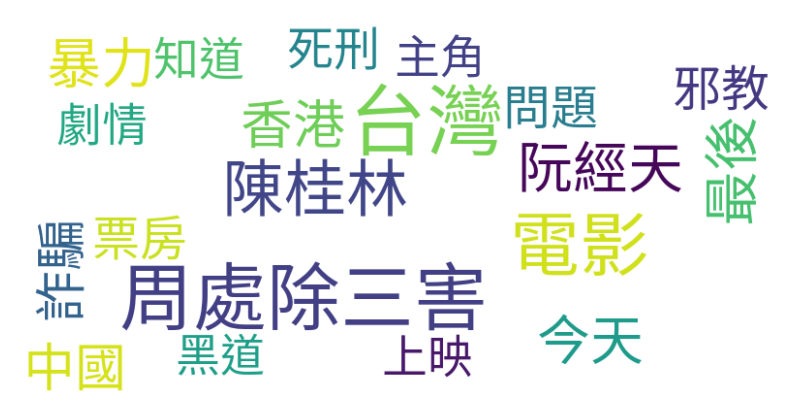

In [154]:
# 使用字典推導式建立 wc_dict
words = word_count_count['word']
sizes = word_count_count['size']
wc_dict = {word: size for word, size in zip(words, sizes)}

# 創建 WordCloud 實例
cloud = WordCloud(max_words=20, background_color='white', width=800, height=400, font_path=FontPath)
cloud.generate_from_frequencies(wc_dict)

# 繪製文字雲
plt.figure(figsize=(10, 7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")

# plt.show()


關鍵字出現了「男主角阮經天」的關鍵字，對此有興趣想進一步分析

(-0.5, 799.5, 399.5, -0.5)

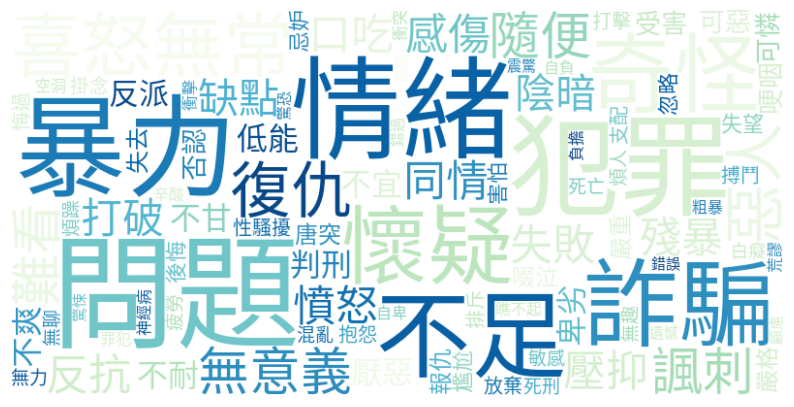

In [155]:
date = "2023-10-01"
end_date = "2024-03-15"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & ( # 時間區間
    ptt_liwc_df_revise['sentiment_class'] == "負向")  & ( # 負面文章
    ptt_liwc_df_revise['artContent'].str.contains('阮經天')) & ( # 內文包含男主
    ptt_liwc_df_revise["sentiments"] == "negative") # 負面情緒字

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()

# wordcloud 的 input 是 dictionary
cloud = WordCloud(max_words=200, background_color='white', width=800, height = 400, font_path = FontPath, colormap="GnBu")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize = (10,7))
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

#### 內文文字雲

接著透過文字雲分析文章內容及常出現的正負面情緒詞彙

In [358]:
ptt_liwc_df["sentiments"].value_counts()

sentiments
affect      2837
positive    1650
negative    1022
anger        322
sad          151
anx          126
Name: count, dtype: int64

In [359]:
#擷取正面
mask = sentiment_count['sentiments'] == 'positive'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

,artDate,sentiments,size,ratio
14,2023-10-03,positive,144,0.929032
258,2024-03-07,positive,75,0.585938
161,2023-11-22,positive,68,0.708333
45,2023-10-09,positive,67,0.638095
165,2023-11-25,positive,62,0.953846


In [360]:
#擷取負面
mask = sentiment_count['sentiments'] == 'negative'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

,artDate,sentiments,size,ratio
233,2024-03-03,negative,61,0.539823
310,2024-03-16,negative,57,0.483051
257,2024-03-07,negative,53,0.414062
281,2024-03-11,negative,51,0.490385
269,2024-03-09,negative,50,0.537634


In [361]:
ptt_liwc_df_revise["sentiments"].value_counts()

sentiments
affect      2635
positive    1498
negative     972
anger        322
sad          151
anx          126
Name: count, dtype: int64

In [364]:
date = "2023-10-01"
end_date = "2024-03-15"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
   ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date())
   
ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word", "sentiments"]]

In [365]:
ptt_df_wc["sentiments"].value_counts()

sentiments
affect      2433
positive    1395
negative     889
anger        288
sad          136
anx          111
Name: count, dtype: int64

(-0.5, 1039.5, 775.5, -0.5)

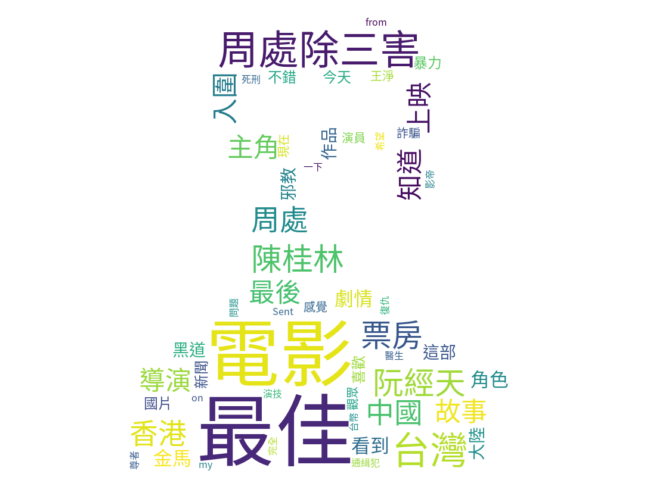

In [366]:
#繪製文字雲
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(50)

#自訂文字雲圖形
mask_tw = np.array(Image.open('pic/man.jpg'))

# wordcloud 的 input 是 dictionary
font_path = "raw_data/SourceHanSansTW-Regular.otf" # 中文字型路徑
cloud = WordCloud(scale = 4, max_words=200, background_color="white", font_path=font_path,mask = mask_tw)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(6, 4), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 1039.5, 775.5, -0.5)

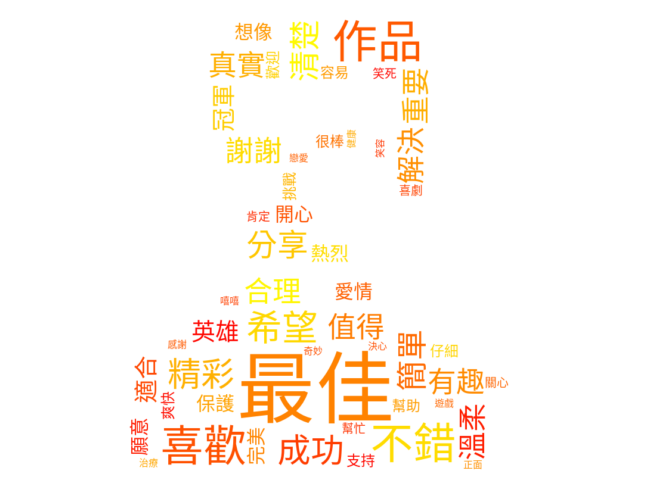

In [367]:
#正面
mask = (ptt_df_wc["sentiments"] == "positive")

ptt_df_st = ptt_df_wc.loc[mask, ["artDate", "word"]]
wc = ptt_df_st.groupby(["word"]).size().to_dict()
Counter(wc).most_common(50)


mask_tw = np.array(Image.open('pic/man.jpg'))

# wordcloud 的 input 是 dictionary
font_path = "raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(scale = 4, max_words=200, background_color="white", font_path=font_path, colormap="autumn",
                  mask = mask_tw,width=2000, height = 1000)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

(-0.5, 1039.5, 775.5, -0.5)

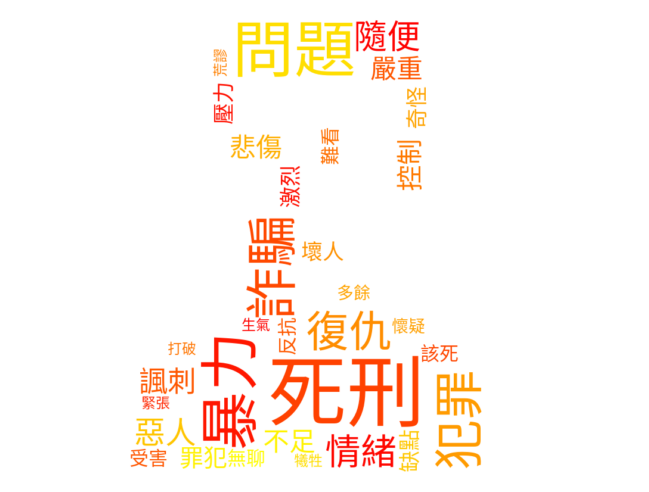

In [368]:
#負面
mask = (ptt_df_wc["sentiments"] == "negative")

ptt_df_st = ptt_df_wc.loc[mask, ["artDate", "word"]]
wc = ptt_df_st.groupby(["word"]).size().to_dict()
Counter(wc).most_common(50)


mask_tw = np.array(Image.open('pic/man.jpg'))

# wordcloud 的 input 是 dictionary
font_path = "raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(scale = 4, max_words=200, background_color="white", font_path=font_path, colormap="autumn",
                  mask = mask_tw,width=2000, height = 1000)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")

### 4. CKIP 搭配 SnowNLP 情緒分析2

### 4.1. 套件
- pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- CKIP: 全名為Chinese Knowledge and Information Processing，中研院開發的中文自然語言處理工具。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。
- SnowNLP: SnowNLP是一個可以方便的處理中文文本內容的python類庫，是受到了TextBlob的啟發而寫的。SnowNLP主要功能包括斷詞、詞性標註、情緒分析、漢字轉拼音、繁體轉簡體、關鍵詞提取以及文本摘要等等。

In [3]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import re
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime

2024-03-26 16:52:41.932220: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


CKIP安裝

In [ ]:
data_utils.download_data_gdown("./")  # 下載ckip model

In [13]:
#將三份工具的模型路徑指向我們剛才下載的檔案「data」
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

2024-03-26 16:54:55.343387: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ckiptagger/model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ckiptagger/model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


### 4.2 CKIP 處理

將抓取結果用CKIP進行處理

In [4]:
## 讀取文章
df = pd.read_csv('./raw_data/moive_1.csv')
df.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02 12:54:55,kevin19528,Gossiping,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mscmobitai"",...",27.53.121.199,2023-10-03 01:31:03,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03 19:55:47,takuminauki,Gossiping,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PanaS0Nic"", ...",114.46.58.46,2023-10-04 01:36:57,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05 19:42:56,Hsins,Gossiping,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tearness"", ""...",61.223.222.252,2023-10-06 01:37:57,ptt


定義文字清理的相關function(跟上次課程做的事情一樣)

In [5]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    

    df['artContent'] = df['artContent'].astype(str)

    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
    # print(len(paragraphs))
    # print(paragraphs)
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except:
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result

In [6]:
# 自定義辭典
with open('dict/user_dict.txt') as f:
    lines = f.read().splitlines()

dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(dict)
print(dictionary2)

[(3, {'陳桂林': 500.0, '桂林仔': 500.0, '阮經天': 500.0}), (5, {'周處除三害': 500.0})]


In [7]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
    # print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id, word, pos]) 
    # print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
    # print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3], entity[2]]) 
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    # 遍歷 dataframe 的每筆資料
    for index, row in data_df.iterrows(): # document level    
    # print(f"\ndocument {index}") 

        # 資料清理 ＆ 斷句
        tmp = Sentence_Segmentation(row['artContent']) 
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2)
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        # 遍歷該 document 中的每一個句子
        for i, sentence in enumerate(flat_list):
            # print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'], sentence])  
            temp_tokens = get_pos(row['system_id'], word_sentence_list[i], pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'], entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['system_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['system_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['system_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [8]:
# 看看 tmp 和 flat_list 有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0]) 
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:5])

[['昨天去看我們金馬男神阮經天演的電影'], ['開播前照慣例都會放過幾天要上映的預告片'], ['之前加減都會放些國外的預告片'], ['結果昨天播了三部電影預告片全部都是臺灣國產'], ['周處除三害']]
['昨天去看我們金馬男神阮經天演的電影', '開播前照慣例都會放過幾天要上映的預告片', '之前加減都會放些國外的預告片', '結果昨天播了三部電影預告片全部都是臺灣國產', '周處除三害']


In [14]:
pos_table, entity_table, sentence_table = get_nlp_result(df)

Exception ignored in: <function WS.__del__ at 0x13caf6160>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ckiptagger/api.py", line 65, in __del__
    self.model.sess.close()
    ^^^^^^^^^^
AttributeError: 'WS' object has no attribute 'model'


time costing: 1356.0471131801605


In [15]:
pos_table.head() # word pos 列表

,system_id,word,pos
0,1,昨天,Nd
1,1,去,D
2,1,看,VC
3,1,我們,Nh
4,1,金馬,Na


In [16]:
entity_table.head() # word entity 列表

,system_id,word,ner
0,1,昨天,DATE
1,1,金馬,WORK_OF_ART
2,1,阮經天,PERSON
3,1,昨天,DATE
4,1,三,CARDINAL


In [17]:
sentence_table.head()

,system_id,sentence
0,1,昨天去看我們金馬男神阮經天演的電影
1,1,開播前照慣例都會放過幾天要上映的預告片
2,1,之前加減都會放些國外的預告片
3,1,結果昨天播了三部電影預告片全部都是臺灣國產
4,1,周處除三害


In [18]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}") #429 篇文
print(f"posts have NER: {len(entity_table['system_id'].unique())}") # 424 篇有抓到ner

total posts numbers: 429
posts have NER: 424


In [19]:
# 將文章存成csv
pos_table.to_csv('raw_data/zh/pos_table_movie.csv', index = False)
entity_table.to_csv('raw_data/zh/entity_table_movie.csv', index = False)
sentence_table.to_csv('raw_data/zh/sentence_table_movie.csv', index = False)

### 4.3 探索分析 - NER

In [20]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("raw_data/zh/pos_table_movie.csv") 
entity_table = pd.read_csv("raw_data/zh/entity_table_movie.csv") 
sentence_table = pd.read_csv("raw_data/zh/sentence_table_movie.csv") 

NER 種類分析
查看標註這個文集後辨識出哪一些實體種類

In [21]:
entity_table['ner'].unique()

array(['DATE', 'WORK_OF_ART', 'PERSON', 'CARDINAL', 'NORP', 'TIME',
       'EVENT', 'ORG', 'GPE', 'ORDINAL', 'LOC', 'MONEY', 'QUANTITY',
       'FAC', 'LANGUAGE', 'PERCENT', 'PRODUCT'], dtype=object)

In [22]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
ner_count

,ner,count
12,PERSON,3255
4,GPE,1134
0,CARDINAL,781
1,DATE,490
8,NORP,349
10,ORG,202
16,WORK_OF_ART,165
7,MONEY,125
9,ORDINAL,122
15,TIME,61


/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_17513/3630343648.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


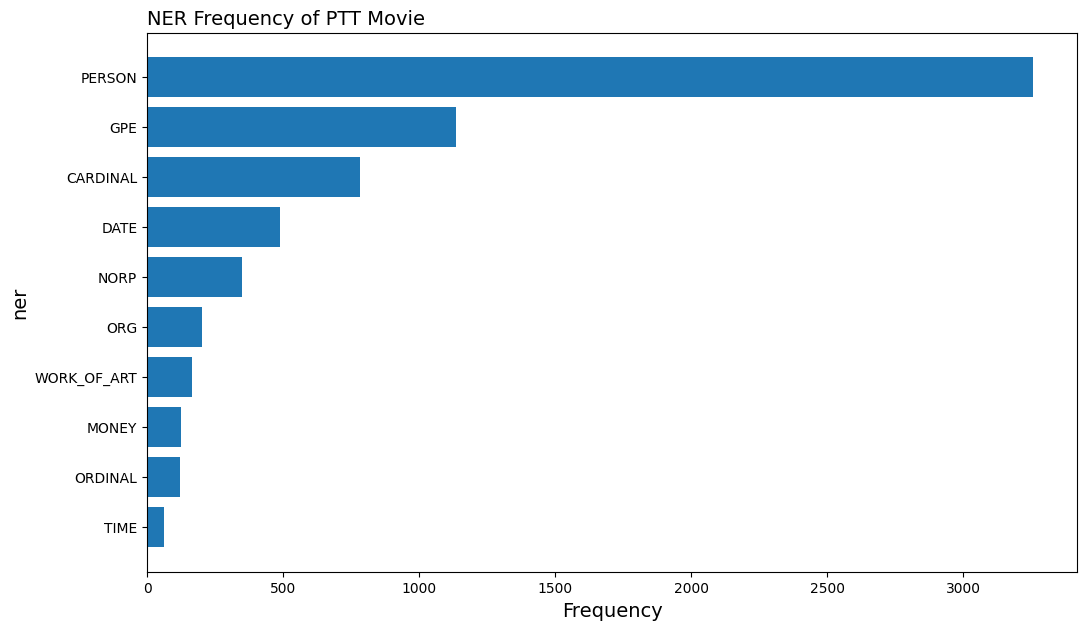

In [23]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of PTT Movie',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

出現最多的實體：1. 人名 2. 地區 3. 數字
可找出自己想要的實體去做更深入的分析

### 涉及到的人物、人名(PERSON)

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_17513/3193034518.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


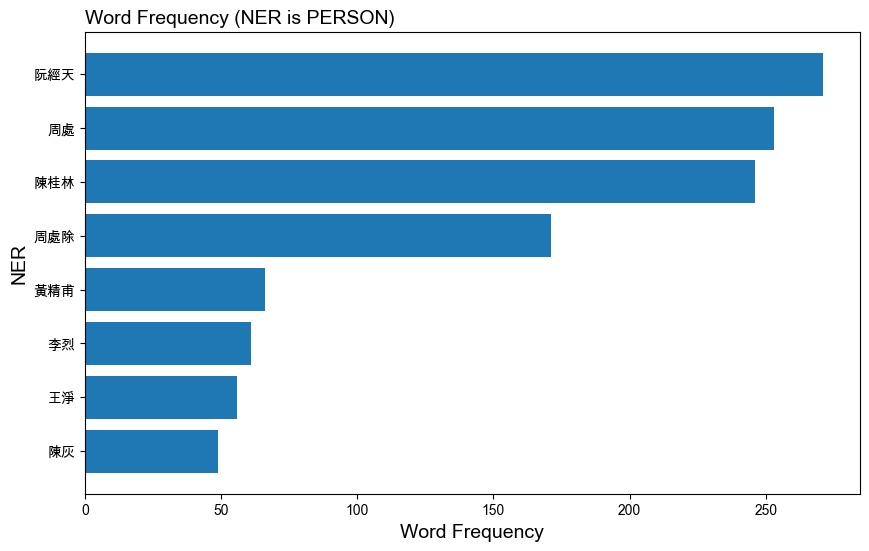

In [27]:
# 篩選ner為PERSON的資料
l_noun = ["PERSON"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()


word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 6))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

討論度最高的就是男主角的本名、角色名字

### 涉及到的地區(GPE)

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_17513/3312647121.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


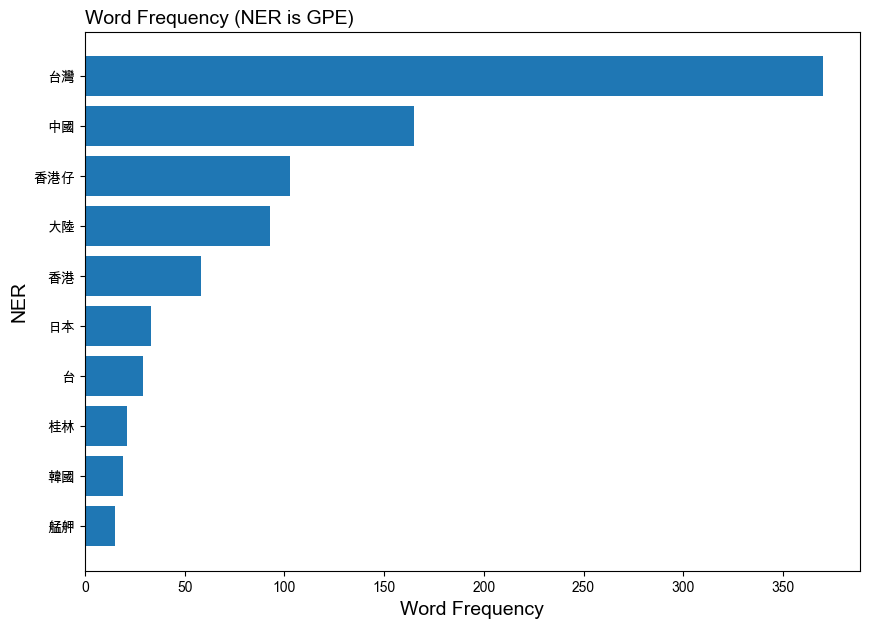

In [26]:
# 篩選ner為GPE的資料
l_noun = ["GPE"]
GPE = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = GPE.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is GPE)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

因為是台灣國片，並且在中國上映造成熱潮，而導演是香港人，裡面也有香港人的角色

### 涉及到的組織(ORG)

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_17513/977120011.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


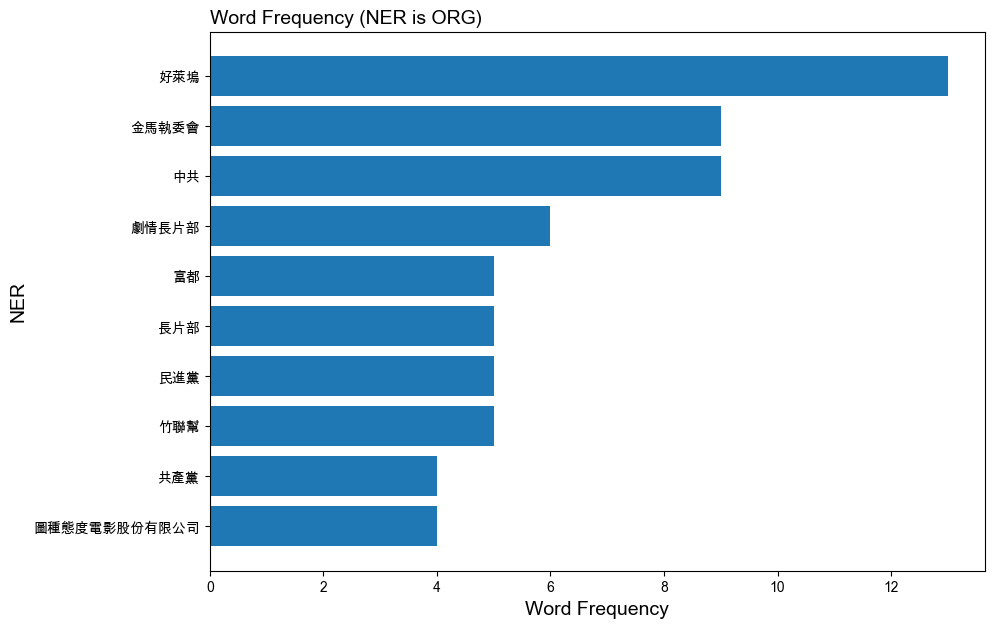

In [28]:
# 篩選ner為ORG的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

### 涉及到的民族、宗教、政治團體(NORP)

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_17513/2872217679.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


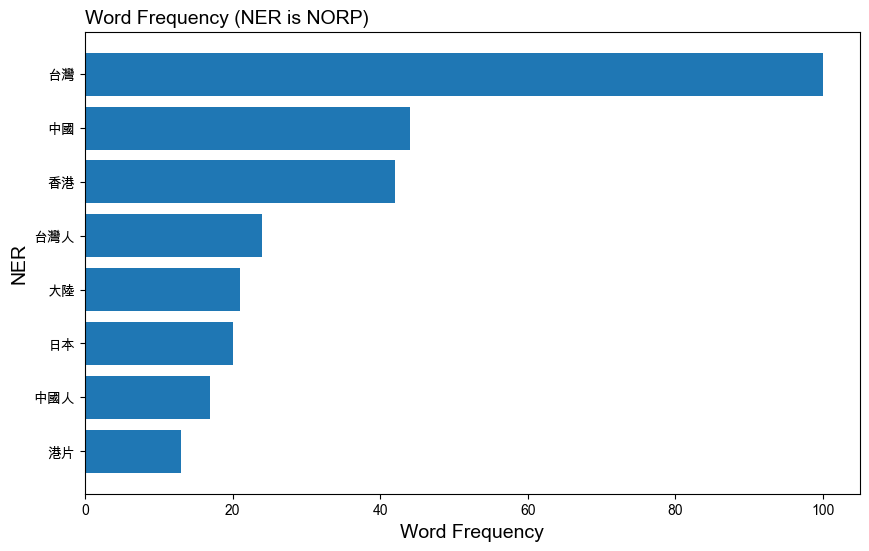

In [29]:
# 篩選ner為NORP的資料
l_noun = ["NORP"]
NORP = entity_table[entity_table.ner.isin(l_noun)]

# 計算每個名詞提到的次數，選出前8個
ner_count = NORP.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()


word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 6))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is NORP)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

In [30]:
keyword_list = ['阮經天']
shu_selected = df[df['artContent'].str.contains('|'.join(keyword_list), na=False, regex=True)]
print(f"{' '.join(keyword_list)}：{shu_selected.shape[0]}篇相關貼文")
shu_selected.head(3)

阮經天：111篇相關貼文


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02 12:54:55,kevin19528,Gossiping,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mscmobitai"",...",27.53.121.199,2023-10-03 01:31:03,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03 19:55:47,takuminauki,Gossiping,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PanaS0Nic"", ...",114.46.58.46,2023-10-04 01:36:57,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06 16:51:01,rainiem3m3,Gossiping,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",49.216.131.16,2023-10-07 01:35:28,ptt


### 4.4 探索分析 - POS

POS 種類分析
查看辨識出哪幾種POS

In [31]:
pos_table['pos'].unique()

array(['Nd', 'D', 'VC', 'Nh', 'Na', 'Nb', 'DE', 'VA', 'Ng', 'Neu', 'Nf',
       'VAC', 'Nc', 'Dk', 'Di', 'Neqa', 'SHI', 'A', 'VK',
       'PARENTHESISCATEGORY', 'Nep', 'Dfa', 'VH', 'T', 'VCL', 'VE', 'Cbb',
       'VJ', 'P', 'Caa', 'VG', 'VL', 'VHC', 'Ncd', 'VD', 'Cab', 'V_2',
       'Nes', 'FW', 'Dfb', 'VF', 'COMMACATEGORY', 'VB', 'Da', 'I', 'VI',
       'Nv', 'Neqb', 'Cba', 'DM', 'SEMICOLONCATEGORY', 'PERIODCATEGORY',
       'COLONCATEGORY'], dtype=object)

除了標點符號，大部分的POS都是哪一類
結果前三名為:普通名詞(Na)、副詞(D)、動作及物動詞(VC)

In [32]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)
pos_count

,pos,count
15,Na,16688
5,D,8350
36,VC,5538
42,VH,5250
6,DE,4223
16,Nb,3838
29,P,3257
17,Nc,2806
27,Nh,2373
25,Nf,2334


/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_17513/867963082.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


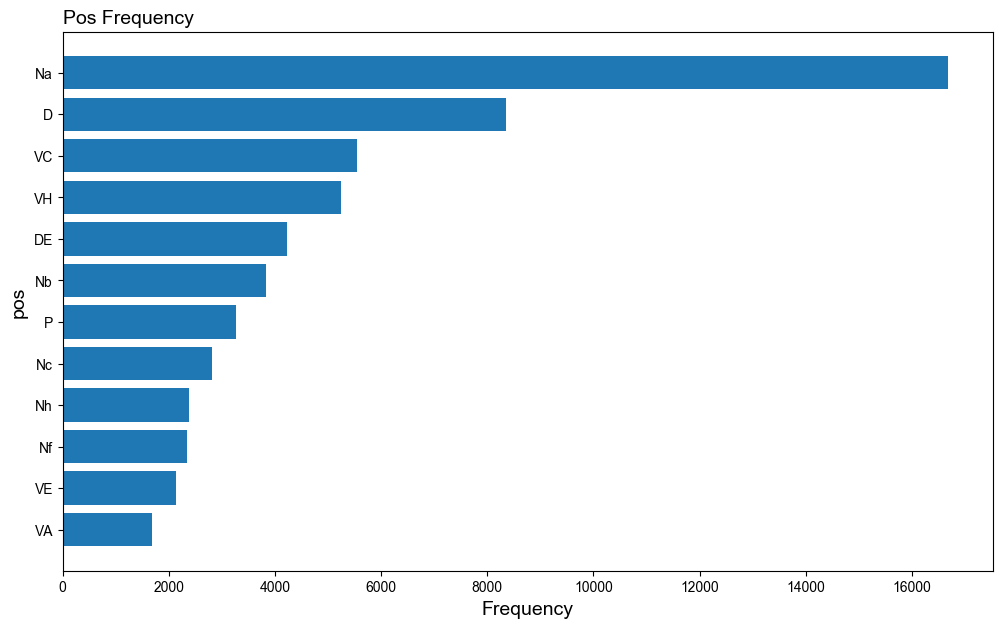

In [33]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('Pos Frequency',loc ='left', size = 14)
ax.set_ylabel('pos', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

涉及到的名詞(Noun)

In [34]:
# 篩選pos為專有名詞的資料
l_noun = ["Nb"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
noun_count.head(10)

,word,count
127,周處除三害,509
814,阮經天,273
870,陳桂林,248
125,周處,183
960,黃精甫,65
792,金馬獎,62
374,李烈,61
544,王淨,58
879,陳灰,46
835,陳以文,44


/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_17513/4129530073.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


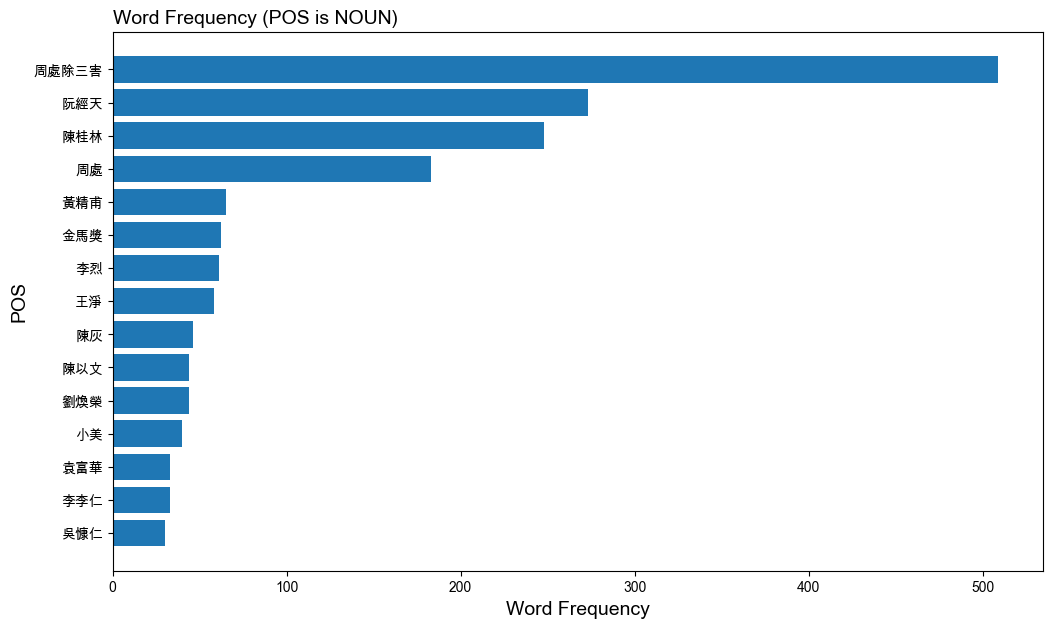

In [35]:
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

涉及到的動詞(VERB)

In [36]:
l_verb = ["VC"] # ,"VH","VA"
verb = pos_table[pos_table.pos.isin(l_verb)] # 選取特定詞性
verb = verb[verb['word'].map(len) > 1] # 把長度為1的字去除掉

verb_count = verb[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
verb_count

,word,count
762,看完,54
1124,飾演,48
370,抄襲,46
9,主演,44
755,監製,38
681,演出,35
789,突破,31
288,幹掉,26
1020,追逐,25
803,累積,25


/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_17513/641757185.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


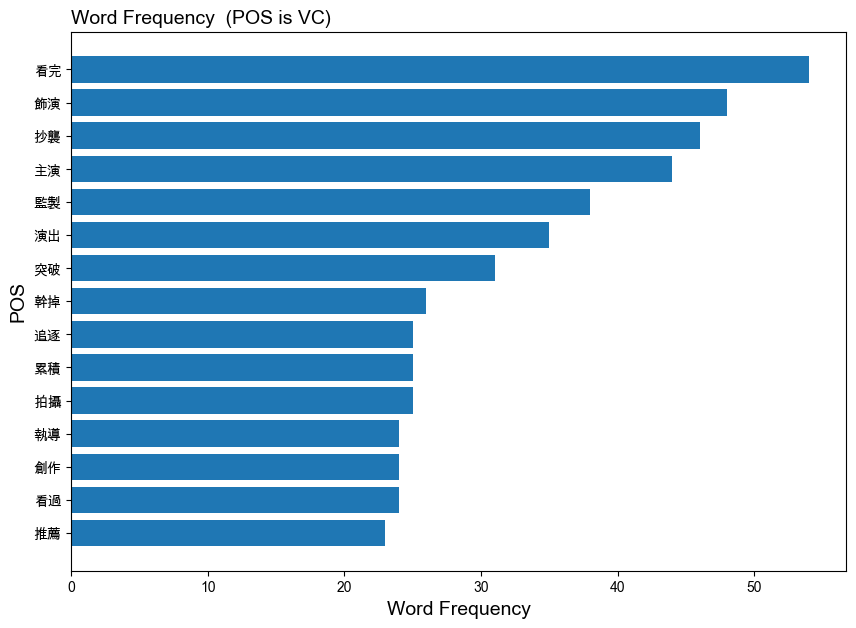

In [38]:
word = verb_count['word']
count = verb_count['count']

plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency  (POS is VC)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

「抄襲」的爭議占了相當高的比率，因為是動作暴力片，戲中片段「幹掉」「追逐」的詞彙也有高頻率的出現。

### 4.5 利用SnowNLP進行情緒分析

- SnowNLP 針對中文設計，可以提取句子的情緒分類
- 使用文件分類法，套件已預先用文集訓練模型以判斷情緒
- 情緒值在 0~1之間，代表負面到正面

In [39]:
from snownlp import SnowNLP
s = SnowNLP('這部電影很讚')
s.sentiments # 範圍在 0~ 1之間 (負面~正面)

0.786074481210413

In [40]:
sentence_table = pd.read_csv("raw_data/zh/sentence_table_movie.csv") #匯資料

sentiment_date = pd.merge(sentence_table,shu_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head(3)

,system_id,sentence,artDate,dataSource
0,1,昨天去看我們金馬男神阮經天演的電影,2023-10-02 12:54:55,ptt
1,1,開播前照慣例都會放過幾天要上映的預告片,2023-10-02 12:54:55,ptt
2,1,之前加減都會放些國外的預告片,2023-10-02 12:54:55,ptt


In [42]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date.head(3)

,system_id,sentence,artDate,dataSource,sentimentValue
0,1,昨天去看我們金馬男神阮經天演的電影,2023-10-02 12:54:55,ptt,0.984942
1,1,開播前照慣例都會放過幾天要上映的預告片,2023-10-02 12:54:55,ptt,0.211599
2,1,之前加減都會放些國外的預告片,2023-10-02 12:54:55,ptt,0.416875


In [43]:
# 看一下情緒的分布
sentiment_date['sentimentValue'].describe()

count    4228.000000
mean        0.496378
std         0.341259
min         0.000002
25%         0.161900
50%         0.500000
75%         0.833926
max         1.000000
Name: sentimentValue, dtype: float64

<Axes: >

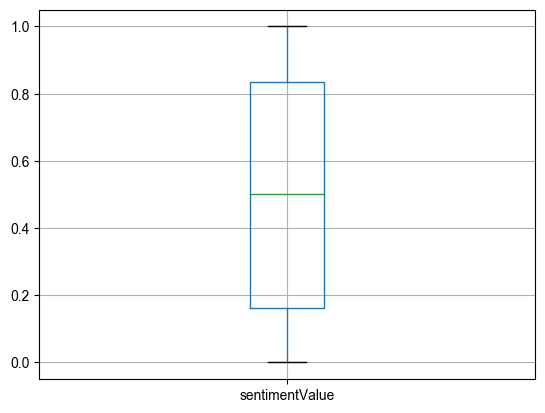

In [44]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

將每個月的情緒分數取平均，並轉換時間格式為年月

In [100]:
sent_date["artDate"].value_counts()

artDate
2023-10    1385
2024-03     781
2023-11     372
2024-02      47
2023-12      34
2024-01      17
Freq: M, Name: count, dtype: int64

In [45]:
sent_date = sentiment_date.copy()
sent_date['artDate'] =  pd.to_datetime(sentiment_date['artDate']).dt.to_period('M')

sentiment_count = sent_date.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count

,artDate,sentimentValue
0,2023-10,0.491213
1,2023-11,0.549840
2,2023-12,0.545321
3,2024-01,0.650052
4,2024-02,0.591692
5,2024-03,0.469272


/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_17513/857956447.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


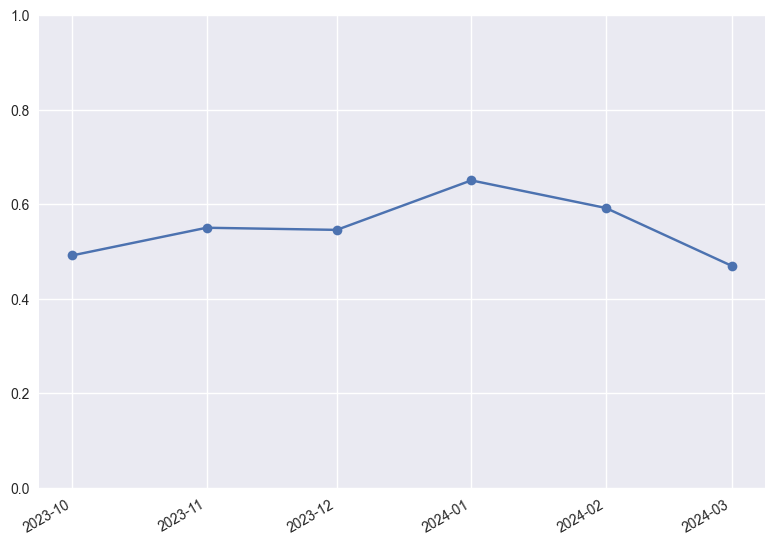

In [46]:
# 平均情緒分數時間趨勢
months = [period.to_timestamp() for period in sentiment_count['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y = sentiment_count['sentimentValue']

plt.style.use('seaborn')

plt.plot_date(months, y, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

周處除三害上映時間:
+ 2023年10月6日（台灣）
+ 2023年11月2日（香港、澳門）
+ 2024年3月1日（中國大陸）同時也是Netflix串流平台上線

### 詞彙探索

選擇時間與情緒分數的門檻，來看情緒句子的結果

In [47]:
print(sent_date['artDate'].unique())

<PeriodArray>
['2023-10', '2023-11', '2024-03', '2023-12', '2024-01', '2024-02']
Length: 6, dtype: period[M]


In [48]:
#正面
filter_sentiment = sent_date[sent_date['artDate']=='2024-03']
filter_sentiment = filter_sentiment.loc[filter_sentiment['sentimentValue'] > 0.8]  

filter_sentiment

,system_id,sentence,artDate,dataSource,sentimentValue
487,29,更衝上當日電影票房第,2024-03,ptt,0.882250
500,30,"房已突破人民幣,萬元約新台幣億元，更度站上當日電影票房第",2024-03,ptt,0.928644
502,30,房也讓電影相關話題在社群發酵，包含先前傳出電影大量暴力血腥內容遭刪減，以及金曲,2024-03,ptt,0.958070
515,30,不少看完電影的網友表示被歌,2024-03,ptt,0.979308
517,30,周處除三害由香港導演黃精甫執導編劇，金馬影帝阮經天領銜主演，袁富華陳以文,2024-03,ptt,0.997166
...,...,...,...,...,...
9032,430,屆金馬獎影帝后合照的重要時刻,2024-03,ptt,0.917743
9034,430,歷屆獲獎者合影，堪稱是金馬影史上的榮耀高光時刻，影帝陳松勇因中風患有糖尿病，,2024-03,ptt,0.939014
9035,430,身體不適因先行離場，沒想到阮經天頒完獎後以趕拍軍中樂園體力無法負荷，拍片太,2024-03,ptt,0.993512
9043,430,走出感情波折與過往是非，阮經天重新展現歲青春期後的成熟男人味，未來還有哪些驚,2024-03,ptt,0.988852


In [49]:
#負面
filter_sentiment_n= sent_date[sent_date['artDate']=='2024-03']
filter_sentiment_n= filter_sentiment_n.loc[filter_sentiment_n['sentimentValue'] < 0.2]  

filter_sentiment_n

,system_id,sentence,artDate,dataSource,sentimentValue
489,29,阮經天有這麼威喔,2024-03,ptt,0.046224
496,30,完整新聞標題,2024-03,ptt,0.072201
497,30,阮經天周處除三害大陸上映天票房達億,2024-03,ptt,0.000558
504,30,"根據貓眼專業版即時數據，截至日下午點分，周處除三害當日票房已來到,萬",2024-03,ptt,0.050601
507,30,導的大陸喜劇電影第二十條,2024-03,ptt,0.181237
...,...,...,...,...,...
9036,430,累自行返家，遭到外界撻伐，連經紀人李烈都不諒解，兩人冷戰了年，直到決定合作,2024-03,ptt,0.001110
9038,430,在外界不諒解下，阮經天過去年陷入低潮期，離開台灣，轉赴大陸拍攝電視劇扶搖,2024-03,ptt,0.115168
9039,430,舌尖上的心跳，始終沒有再創佳績,2024-03,ptt,0.080350
9041,430,，重新回到個演員身分再出發，去感受角色的變化轉折，沒有帥氣外表與華服陪襯，讓,2024-03,ptt,0.000114


In [50]:
# 正面
# 把時間分數和之前斷詞的 token table 做 join
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]

# 篩選掉只有單個字元的結果
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

pos_words.head(30)

,system_id,sentimentValue,word
0,29,0.882250,周處除三害
2,29,0.882250,昨天
4,29,0.882250,對岸
5,29,0.882250,上映
9,29,0.882250,票房
13,29,0.882250,台幣
15,29,0.882250,衝上
16,29,0.882250,當日
17,29,0.882250,電影
18,29,0.882250,票房


正面詞彙文字雲

In [51]:
# 自定停用字
with open('dict/stopwords.txt') as f:
    stop_words = f.read().splitlines()

print(stop_words)

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一切', '一則', '一方面', '一旦', '一來', '一樣', '一般', '一轉眼', '萬一', '上', '上下', '下', '不', '不僅', '不但', '不光', '不單', '不只', '不外乎', '不如', '不妨', '不盡', '不盡然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不獨', '不管', '不至於', '不若', '不論', '不過', '不問', '與', '與其', '與其說', '與否', '與此同時', '且', '且不說', '且說', '兩者', '個', '個別', '臨', '為', '為了', '為什麼', '為何', '為止', '為此', '為著', '乃', '乃至', '乃至於', '麼', '之', '之一', '之所以', '之類', '烏乎', '乎', '乘', '也', '也好', '也罷', '了', '二來', '於', '於是', '於是乎', '云云', '云爾', '些', '亦', '人', '人們', '人家', '什麼', '什麼樣', '今', '介於', '仍', '仍舊', '從', '從此', '從而', '他', '他人', '他們', '以', '以上', '以為', '以便', '以免', '以及', '以故', '以期', '以來', '以至', '以至於', '以致', '們', '任', '任何', '任憑', '似的', '但', '但凡', '但是', '何', '何以', '何況', '何處', '何時', '余外', '作為', '你', '你們', '使', '使得', '例如', '依', '依據', '依照', '便於', '俺', '俺們', '倘', '倘使', '倘或', '倘然', '倘若', '借', '假使', '假如', '假若', '儻然', '像', '兒', '先不先', '光是', '全體', '全部', '

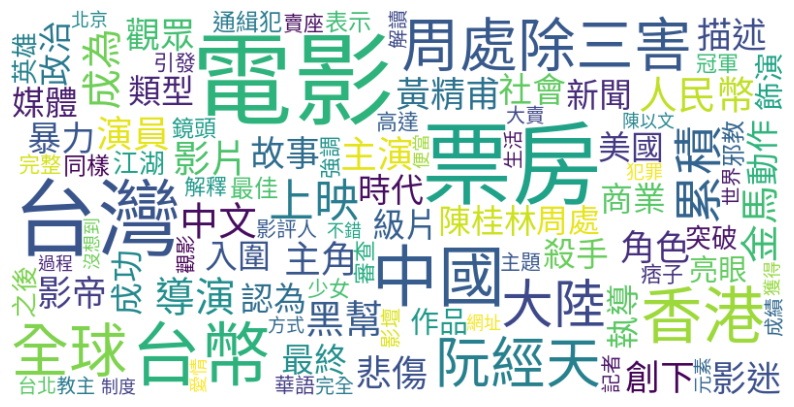

In [52]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('昨天','今天','最後'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'raw_data/SourceHanSansTW-Regular.otf' # 設定字型

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800, 
                height = 400, 
                max_words=100, 
                background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

### 可以從上圖文字雲看到所有正面文章出現的詞彙

### 5. 結論

可以看到從netfilx上架後，看到台灣對於周處除三害這部電影的討論度急劇上升！！